In [ ]:
# Paquetes !
# -----------------------------
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 1. Importación de datos

In [ ]:
AMZ = yf.Ticker('AMZN').history('max')['Close']
ML = yf.Ticker('MELI').history('max')['Close']
SP = yf.Ticker('SE').history('max')['Close']
EB = yf.Ticker('EBAY').history('max')['Close']

data = pd.concat([AMZ,ML,SP,EB],axis=1, 
             keys=['Amazon', 'Mercado Libre', 'Shopee', 'Ebay'])
data

,Amazon,Mercado Libre,Shopee,Ebay
Date,,,,
1997-05-15 00:00:00-04:00,0.097917,NaN,NaN,NaN
1997-05-16 00:00:00-04:00,0.086458,NaN,NaN,NaN
1997-05-19 00:00:00-04:00,0.085417,NaN,NaN,NaN
1997-05-20 00:00:00-04:00,0.081771,NaN,NaN,NaN
1997-05-21 00:00:00-04:00,0.071354,NaN,NaN,NaN
...,...,...,...,...
2022-11-14 00:00:00-05:00,98.489998,959.580017,45.799999,45.910000
2022-11-15 00:00:00-05:00,98.940002,1020.679993,62.310001,47.020000
2022-11-16 00:00:00-05:00,97.120003,972.820007,58.759998,45.490002


# 2. Descripción de la importación de los datos

Los datos fueron obtenidos del paquete 'yfinance' de Python soportado gracias a Yahoo! finance (https://finance.yahoo.com/) donde se actualizan los datos en tiempo real día a día. Con el comando,
$$yf.Ticker(CODE).history('max')['Close']$$
Se obtiene el activo financiero en todo el periodo historico desde que la empresa (CODE, dado en acronimo) empieza a cotizar en bolsa. Por otro lado; Yahoo finance funciona con servidores activos 24H, por lo cual hace que no sea necesario descargar ni cargar en Python ningún tipo de archivo.

# 3. Descripción de los datos

Dado que son precios de cierre en las acciones de ciertas empresas, serán las cuatro variables datos cuantitativos continuos dado en dólares para todo el periodo historico registrado, el cual podemos ver que son 6423 registros para los cuales no todas las variables posee datos en los primeros días. Podemos ver que Amazon cotizó en bolsa antes (1997) que Mercado Libre, Shopee y Ebay.

# 4. Estadistica descriptiva

In [ ]:
data.describe()

,Amazon,Mercado Libre,Shopee,Ebay
count,6423.000000,3848.000000,1280.000000,6080.000000
mean,30.686932,343.178513,99.666211,20.644709
std,47.794772,451.693073,99.975185,15.447203
min,0.069792,8.023303,10.340000,0.481848
25%,1.988500,69.314173,15.907500,9.342196
50%,6.234500,120.083008,51.525000,15.476283
75%,36.591999,378.832504,163.290005,27.772664
max,186.570496,1984.339966,366.989990,79.297478


Vemos que Mercado Libre tiene mayor precio cierre en promedio que las demás compañias pero así mismo, una desviación estandar más alta. Lo que nos indica que en promedio, es más cotizada y por ende, más valorada en bolsa que las demás pero con una mayor cantidad de datos atipicos; es decir, periodos de tiempo en que la compañía posee máximos historicos. Mientras que Ebay y Amazon tiene un precio cierre más equilibrado con muy pocos datos atipicos; esto es,
$$\textit{Coeficiente de variación}: CV_x=\frac{\sigma_x}{\mu_x}\approx1$$

In [ ]:
data.corr()

,Amazon,Mercado Libre,Shopee,Ebay
Amazon,1.000000,0.947313,0.899560,0.942759
Mercado Libre,0.947313,1.000000,0.938885,0.911781
Shopee,0.899560,0.938885,1.000000,0.940617
Ebay,0.942759,0.911781,0.940617,1.000000


Concluimos que las variables están altamente correlacionadas (aún con alzas y bajas historicas); es decir, para $i,j=1,2,3,4$,
$$r_{ij}=\left|\frac{\sigma_{ij}}{\sqrt{\sigma_{ii}\sigma_{jj}}}\right|=\frac{|\sigma_{ij}|}{\sqrt{\sigma_{ii}\sigma_{jj}}}<1$$

# 5. Gráficos estadisticos

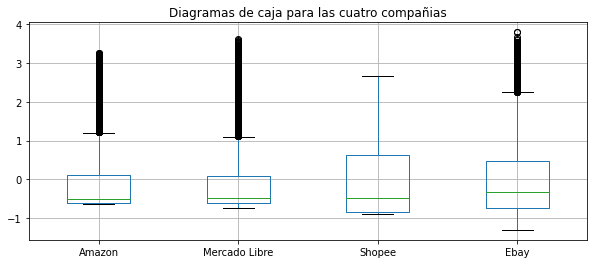

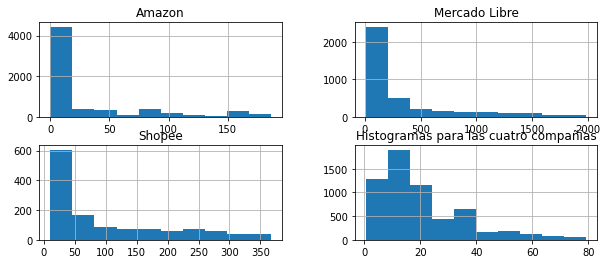

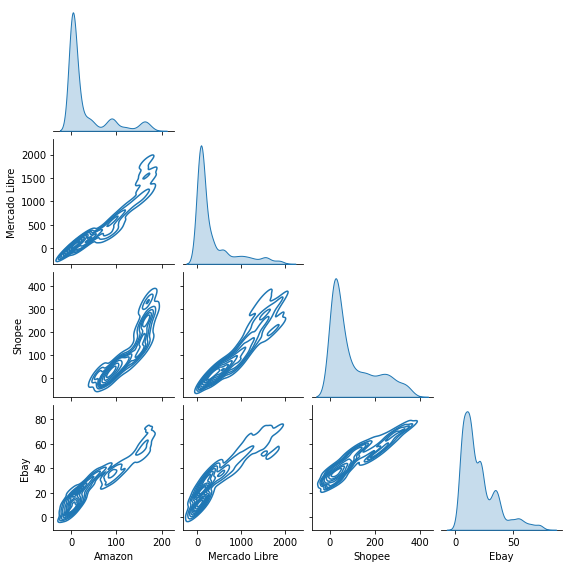

In [ ]:
((data-data.mean())/data.std()).boxplot(figsize=(10,4))
plt.title('Diagramas de caja para las cuatro compañias'); plt.show()
data.hist(figsize=(10,4)); plt.show()
sns.pairplot(data,kind="kde",height=2, corner=True); plt.show()